# Libraries

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.linear_model
import sklearn.metrics

# Read data

In [2]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 3 - Classification/Section 14 - Logistic Regression/'
df=pd.read_csv(work_dir+'Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df=df.drop('User ID',axis=1)
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
X=df[['Gender','Age','EstimatedSalary']].values
Y=df['Purchased'].values
X,Y

(array([['Male', 19, 19000],
        ['Male', 35, 20000],
        ['Female', 26, 43000],
        ..., 
        ['Female', 50, 20000],
        ['Male', 36, 33000],
        ['Female', 49, 36000]], dtype=object),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 

# Clean up missing data

In [20]:
sum(X!=X),sum(np.isnan(Y))

(array([0, 0, 0]), 0)

In [9]:
# imputer=sklearn.preprocessing.Imputer(missing_values='NaN',strategy='mean',axis=0).fit(X[:,1:3])
# X[:,1:3]=imputer.transform(X[:,1:3])
# X

# Create dummy variables

In [11]:
label_encoder=sklearn.preprocessing.LabelEncoder().fit(X[:,0])
X[:,0]=label_encoder.transform(X[:,0])
# one_hot_encoder=sklearn.preprocessing.OneHotEncoder(categorical_features=[0]).fit(X)
# X=one_hot_encoder.transform(X).toarray()
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ..., 
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

# Avoid the dummy variable trap

In [9]:
# X=X=np.delete(X,0,1)
# X

# Create categorical labels

In [11]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(Y)
# Y=label_encoder.transform(Y)
# Y

# Feature scaling

In [29]:
X_scaler=sklearn.preprocessing.StandardScaler().fit(X[:,1:])
X_scaled=np.append(X[:,[0]],X_scaler.transform(X[:,1:]),axis=1)
X_scaled
# X_scaler,Y_scaler=sklearn.preprocessing.StandardScaler().fit(X),sklearn.preprocessing.StandardScaler().fit(Y)
# X_scaled,Y_scaled=X_scaler.transform(X),Y_scaler.transform(Y)
# X_scaled,Y_scaled

/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[1, -1.7817974284598157, -1.4900462352132775],
       [1, -0.25358735848624026, -1.4606813786292843],
       [0, -1.1132055228463764, -0.7852896771974396],
       ..., 
       [0, 1.1791095821139865, -1.4606813786292843],
       [1, -0.15807422911289182, -1.0789382430373722],
       [0, 1.083596452740638, -0.9908436732853924]], dtype=object)

# Train/test split

In [30]:
X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X_scaled,Y,
                                                                        test_size=0.25,random_state=0)
Y_train.size,Y_test.size

(300, 100)

In [32]:
# X_train,Y_train

In [34]:
# X_test,Y_test

# Logistic Regression - sklearn.linear_model.LogisticRegression()

## Age, Salary and Gender

In [37]:
log_reg=sklearn.linear_model.LogisticRegression(random_state=0).fit(X_train,Y_train)
log_reg.score(X_train,Y_train),log_reg.score(X_test,Y_test)

(0.82999999999999996, 0.90000000000000002)

In [41]:
sklearn.metrics.confusion_matrix(Y_test,log_reg.predict(X_test))

array([[65,  3],
       [ 7, 25]])

In [43]:
print(sklearn.metrics.classification_report(Y_test,log_reg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93        68
          1       0.89      0.78      0.83        32

avg / total       0.90      0.90      0.90       100



## Age and Salary (i.e., without Gender)

In [44]:
log_reg=sklearn.linear_model.LogisticRegression(random_state=0).fit(X_train[:,1:],Y_train)
log_reg.score(X_train[:,1:],Y_train),log_reg.score(X_test[:,1:],Y_test)

(0.82333333333333336, 0.89000000000000001)

In [45]:
sklearn.metrics.confusion_matrix(Y_test,log_reg.predict(X_test[:,1:]))

array([[65,  3],
       [ 8, 24]])

In [46]:
print(sklearn.metrics.classification_report(Y_test,log_reg.predict(X_test[:,1:])))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92        68
          1       0.89      0.75      0.81        32

avg / total       0.89      0.89      0.89       100



In [78]:
def range_plot_X(X,num=100,ext=0.1):
    max_X,min_X=max(X),min(X)
    delta=max_X-min_X
    max_X,min_X=max_X+ext*delta,min_X-ext*delta
    delta=(max_X-min_X)/(num-1)
    return np.array(np.arange(min_X,max_X+delta,delta)[:num].reshape((num,1)))

In [117]:
X_plot,Y_plot=np.meshgrid(range_plot_X(X_scaled[:,1],num=1000),range_plot_X(X_scaled[:,2],num=1000))
cmap_lst=('red','green')

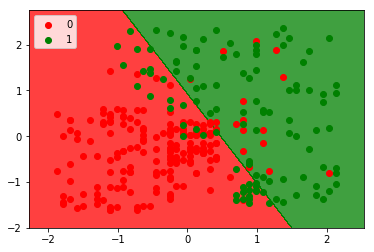

In [118]:
plt.contourf(X_plot,Y_plot,log_reg.predict(np.array([X_plot.ravel(),Y_plot.ravel()]).T).reshape(X_plot.shape),
             alpha=0.75,cmap=matplotlib.colors.ListedColormap(cmap_lst))
plt.scatter(X_train[Y_train==0,1],X_train[Y_train==0,2],c=cmap_lst[0],label=0)
plt.scatter(X_train[Y_train==1,1],X_train[Y_train==1,2],c=cmap_lst[1],label=1)
plt.legend()
plt.show()

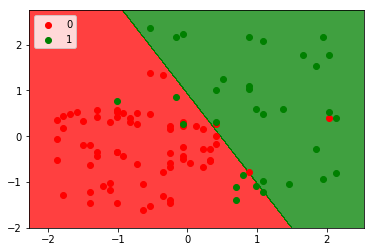

In [119]:
plt.contourf(X_plot,Y_plot,log_reg.predict(np.array([X_plot.ravel(),Y_plot.ravel()]).T).reshape(X_plot.shape),
             alpha=0.75,cmap=matplotlib.colors.ListedColormap(cmap_lst))
plt.scatter(X_test[Y_test==0,1],X_test[Y_test==0,2],c=cmap_lst[0],label=0)
plt.scatter(X_test[Y_test==1,1],X_test[Y_test==1,2],c=cmap_lst[1],label=1)
plt.legend()
plt.show()